In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-df8d4958-8922-bc0b-453b-742a368560aa)


In [3]:
# Hide warning logs 
import os 
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# Checking Tensorflow version 
import tensorflow as tf 
print(tf.__version__)

2.8.0


In [4]:
# Get Tensorflow Datasets
import tensorflow_datasets as tfds 


In [5]:
# List available Datasets 
datasets_list = tfds.list_builders()
print("food101" in datasets_list)

True


In [6]:
(train_data, test_data), ds_info = tfds.load(name = "food101", 
                                             split = ["train", "validation"], 
                                             shuffle_files = True, 
                                             as_supervised = True, 
                                             with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteCIK48Q/food101-train.tfrecord


  0%|          | 0/75750 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteCIK48Q/food101-validation.tfrecord


  0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [7]:
# Features of Food101 TFDS 
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [8]:
# Get class name 
class_names = ds_info.features["label"].names
class_names[:10] 

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

## **Exploring the Food101 data from TensorFlow Datasets**

In [9]:
# Take one sample off the training data 
train_one_sample = train_data.take(1)

In [10]:
# What does one sample of our training data look like >
train_one_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [11]:
# Output info about our training sample 
for image, label in train_one_sample:
    print(f"""
    Image shape: {image.shape}
    Image dtype: {image.dtype}
    Target class from Food101 (tensor form): {label}
    Class name (str form): {class_names[label.numpy()]}
    """)


    Image shape: (341, 512, 3)
    Image dtype: <dtype: 'uint8'>
    Target class from Food101 (tensor form): 98
    Class name (str form): tiramisu
    


In [12]:
# what does an image tensor from TDFS's Food101 look like?
image

<tf.Tensor: shape=(341, 512, 3), dtype=uint8, numpy=
array([[[  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0],
        ...,
        [  0,   3,   0],
        [  0,   4,   0],
        [  0,   4,   0]],

       [[  2,   2,   0],
        [  2,   2,   0],
        [  3,   3,   1],
        ...,
        [  1,   3,   0],
        [  0,   4,   0],
        [  0,   4,   0]],

       [[  5,   6,   1],
        [  5,   6,   1],
        [  5,   6,   1],
        ...,
        [  1,   3,   0],
        [  0,   4,   0],
        [  0,   5,   1]],

       ...,

       [[143,  75,  10],
        [149,  81,  16],
        [150,  85,  19],
        ...,
        [162,  88,  25],
        [150,  79,  17],
        [135,  65,   5]],

       [[144,  76,  11],
        [152,  84,  19],
        [145,  80,  16],
        ...,
        [126,  60,  12],
        [111,  50,   3],
        [ 95,  37,   0]],

       [[145,  77,  14],
        [150,  82,  19],
        [139,  74,  10],
        ...,
        [ 89,  35,   

In [13]:
# What are the min and max values?
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

### **Plot an image from TensorFlow Datasets**

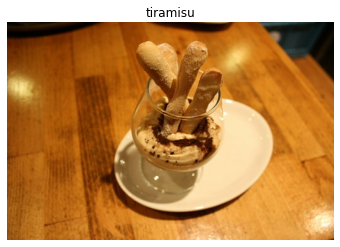

In [14]:
# Plot an image tensor 
import matplotlib.pyplot as plt 
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

## **Create preprocessing functions for our data**

In [15]:
def preprocess_img(image, label, img_shape=224):
    """
    Converts image datatype from 'uint8' -> 'float32' and reshapes image to 
    [img_shape, img_shape, color_channels]
    """
    image = tf.image.resize(image, [img_shape, img_shape])
    return tf.cast(image, tf.float32), label

In [16]:
# Preprocess a single image and check the outputs 
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}..., \nShape: {image.shape}, \nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}..., \nShape: {preprocessed_img.shape}, \nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[2 2 0]
  [2 2 0]
  [2 2 0]
  ...
  [0 3 0]
  [0 4 0]
  [0 4 0]]

 [[2 2 0]
  [2 2 0]
  [3 3 1]
  ...
  [1 3 0]
  [0 4 0]
  [0 4 0]]]..., 
Shape: (341, 512, 3), 
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[2.         2.         0.        ]
  [2.947226   2.947226   0.947226  ]
  [4.         5.         0.        ]
  ...
  [1.         3.         0.        ]
  [0.01865775 2.757497   0.        ]
  [0.         4.         0.        ]]

 [[4.3504467  5.133929   0.7834822 ]
  [4.566964   5.3504467  1.        ]
  [4.783482   5.783482   0.7834822 ]
  ...
  [1.         3.         0.        ]
  [0.7989506  2.7989507  0.        ]
  [0.         4.2798424  0.2798424 ]]]..., 
Shape: (224, 224, 3), 
Datatype: <dtype: 'float32'>


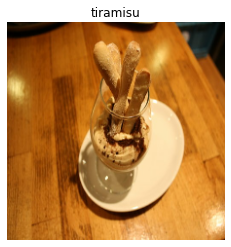

In [17]:
# How does it look ?
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])
plt.axis(False);

## **Batch & prepare datasets**

In [18]:
# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func = preprocess_img, num_parallel_calls = tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it(load it faster)
train_data = train_data.shuffle(buffer_size = 1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

# Map preprocessing function to test data 
test_data = test_data.map(preprocess_img, num_parallel_calls = tf.data.AUTOTUNE)
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [19]:
train_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## **Create modelling callbacks**

In [20]:
import datetime 

In [21]:
def create_tensorboard_callback(dir_name, experiment_name):
    """
    Creates a TensorBoard callback instand to store log files.
    
    Stores log files with the filepath:
        "dir_name/experiment_name/current_datetime/"

    Args: 
        dir_name: target directory to store TensorBoard log files
        experiment_name: name of experiment directory (e.g. efficientnet_model_1)
    """
    log_dir = dir_name + "/" + experiment_name +"/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir = log_dir
    )
    print(f"Savings TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [22]:
# Create ModelCheckpoint callback to save model's progress 
checkpoint_path = "model_checkpoints/cp.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                      monitor = "val_accuracy", 
                                                      save_best_only = True, 
                                                      save_weights_only = True, 
                                                      verbose = 1)

## **Setup mixed precision training**

In [23]:
# Turn on mixed precision training 
from tensorflow.keras import mixed_precision 
mixed_precision.set_global_policy(policy = "mixed_float16")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


In [24]:
mixed_precision.global_policy()

<Policy "mixed_float16">

## **Build feature extraction model**

In [25]:
from tensorflow.keras import layers 
from tensorflow.keras.layers.experimental import preprocessing 

# Create base model 
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False # freeze base model layers

# Create Functional model 
inputs = layers.Input(shape = input_shape, name = "input_layer", dtype = tf.float16)
x = base_model(inputs, training = False)
x = layers.GlobalAveragePooling2D(name = "pooling_layer")(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype = tf.float32, name = "softmax_float32")(x) 
model = tf.keras.Model(inputs, outputs)

# Compile the model 
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = tf.keras.optimizers.Adam(), 
              metrics = ["accuracy"])

16719872/16705208 [==============================] - 0s 0us/step


In [26]:
# Check out our model 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

### **Checking layer dtype policies (are we using mixed precision?)**

In [27]:
for layer in model.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float16 <Policy "float16">
efficientnetb0 False float32 <Policy "mixed_float16">
pooling_layer True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [28]:
# Check the layers in the base model and see what dtype policy they're using 
for layer in model.layers[1].layers[:20]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <Policy "mixed_float16">
block2a_expand_bn False flo

## **Fit the Feature extraction model**

In [29]:
from gc import callbacks
# Fit the model with callbacks 
history_101_food_classes_feature_extract = model.fit(train_data, 
                                                     epochs = 3, 
                                                     steps_per_epoch = len(train_data), 
                                                     validation_data = test_data, 
                                                     validation_steps = int(0.15 * len(test_data)), 
                                                     callbacks = [create_tensorboard_callback("training_logs", 
                                                                                              "efficientnetb0_101_classes_all_data_feature_extract"), 
                                                                  model_checkpoint])

Savings TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20220321-164623
Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.8240 - accuracy: 0.5564
Epoch 1: val_accuracy improved from -inf to 0.67585, saving model to model_checkpoints/cp.ckpt
2368/2368 [==============================] - 193s 74ms/step - loss: 1.8240 - accuracy: 0.5564 - val_loss: 1.2352 - val_accuracy: 0.6758
Epoch 2/3
2368/2368 [==============================] - ETA: 0s - loss: 1.2934 - accuracy: 0.6662
Epoch 2: val_accuracy improved from 0.67585 to 0.70207, saving model to model_checkpoints/cp.ckpt
2368/2368 [==============================] - 173s 73ms/step - loss: 1.2934 - accuracy: 0.6662 - val_loss: 1.1209 - val_accuracy: 0.7021
Epoch 3/3
2368/2368 [==============================] - ETA: 0s - loss: 1.1423 - accuracy: 0.7028
Epoch 3: val_accuracy improved from 0.70207 to 0.71081, saving model to model_checkpoints/cp.ckpt
2368/2368 [===================

In [30]:
# Evaluate model (unsaved version) on whole test dataset
results_feature_extract_model = model.evaluate(test_data) 
results_feature_extract_model 

790/790 [==============================] - 49s 61ms/step - loss: 1.0888 - accuracy: 0.7080


[1.0888333320617676, 0.7079603672027588]

## **Load and evaluate checkpoint weights**

In [31]:
# Cloned the model 
cloned_model = tf.keras.models.clone_model(model)
cloned_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [32]:
!ls model_checkpoints/

checkpoint  cp.ckpt.data-00000-of-00001  cp.ckpt.index


In [33]:
# Where are our checkpoints stored?
checkpoint_path 

'model_checkpoints/cp.ckpt'

In [34]:
# Load checkpointed weights into cloned_model 
cloned_model.load_weights(checkpoint_path)

In [35]:
# Compile cloned_model (with same parameters as original model)
cloned_model.compile(loss= "sparse_categorical_crossentropy", 
                     optimizer = tf.keras.optimizers.Adam(), 
                     metrics = ["accuracy"])

In [36]:
# Evaluate cloned model with loaded weights 
results_cloned_model_with_loaded_weights = cloned_model.evaluate(test_data)

790/790 [==============================] - 52s 62ms/step - loss: 1.7554 - accuracy: 0.5423


In [37]:
# Check the layers in the base model and see what dtype policy they're using 
for layer in cloned_model.layers[1].layers[:20]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 True float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <Policy "mixed_float16">
block2a_expand_bn False floa

## **Save the whole model to file**

In [38]:
# Save model locally 
save_dir = "07_efficientnetb0_feature_extract_model_mixed_precision"
model.save(save_dir) 

INFO:tensorflow:Assets written to: 07_efficientnetb0_feature_extract_model_mixed_precision/assets


INFO:tensorflow:Assets written to: 07_efficientnetb0_feature_extract_model_mixed_precision/assets


In [39]:
# Load model previously saved above
loaded_saved_model = tf.keras.models.load_model(save_dir)

In [40]:
# Check the layers in the base model and see what dtype policy they're using 
for layer in loaded_saved_model.layers[1].layers[:20]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 True float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <Policy "mixed_float16">
block2a_expand_bn False floa

In [41]:
results_loaded_saved_model = loaded_saved_model.evaluate(test_data)
results_loaded_saved_model 

790/790 [==============================] - 50s 62ms/step - loss: 1.0888 - accuracy: 0.7080


[1.0888346433639526, 0.7079603672027588]

In [42]:
import numpy as np 
assert np.isclose(results_feature_extract_model, results_loaded_saved_model).all()

## **Preparing our model's layers for fine-tuning**

In [43]:
loaded_saved_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [44]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                                  patience = 3)

# Create ModelCheckpoint callback to save best model during fine-tuning 
checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                      save_best_only = True, 
                                                      monitor = "val_loss")

In [45]:
# Creating Learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", 
                                                 factor = 0.2, 
                                                 patience = 2, 
                                                 verbose = 1, 
                                                  min_lr = 1e-7)

In [46]:
# Compile the model 
loaded_saved_model.compile(loss = "sparse_categorical_crossentropy", 
                           optimizer = tf.keras.optimizers.Adam(0.0001), 
                           metrics = ["accuracy"])

In [47]:
history_101_food_classes_all_data_fine_tune = loaded_saved_model.fit(train_data, 
                                                                     epochs = 100, 
                                                                     steps_per_epoch = len(train_data), 
                                                                     validation_data = test_data, 
                                                                     validation_steps = int(0.15 * len(test_data)), 
                                                                     callbacks = [create_tensorboard_callback("training_logs", "efficientb0_101_classes_all_data_fine_tuning"), 
                                                                                  model_checkpoint, 
                                                                                  early_stopping, 
                                                                                  reduce_lr]
                                                                     )

Savings TensorBoard log files to: training_logs/efficientb0_101_classes_all_data_fine_tuning/20220321-165930
Epoch 1/100
2367/2368 [============================>.] - ETA: 0s - loss: 0.9725 - accuracy: 0.7518INFO:tensorflow:Assets written to: fine_tune_checkpoints/assets


INFO:tensorflow:Assets written to: fine_tune_checkpoints/assets


2368/2368 [==============================] - 222s 91ms/step - loss: 0.9724 - accuracy: 0.7519 - val_loss: 1.0522 - val_accuracy: 0.7203 - lr: 1.0000e-04
Epoch 2/100
2367/2368 [============================>.] - ETA: 0s - loss: 0.9551 - accuracy: 0.7573INFO:tensorflow:Assets written to: fine_tune_checkpoints/assets


INFO:tensorflow:Assets written to: fine_tune_checkpoints/assets


2368/2368 [==============================] - 217s 91ms/step - loss: 0.9550 - accuracy: 0.7573 - val_loss: 1.0446 - val_accuracy: 0.7214 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - ETA: 0s - loss: 0.9440 - accuracy: 0.7603INFO:tensorflow:Assets written to: fine_tune_checkpoints/assets


INFO:tensorflow:Assets written to: fine_tune_checkpoints/assets


2368/2368 [==============================] - 219s 92ms/step - loss: 0.9440 - accuracy: 0.7603 - val_loss: 1.0434 - val_accuracy: 0.7238 - lr: 1.0000e-04
Epoch 4/100
2368/2368 [==============================] - 165s 69ms/step - loss: 0.9342 - accuracy: 0.7633 - val_loss: 1.0461 - val_accuracy: 0.7238 - lr: 1.0000e-04
Epoch 5/100
2367/2368 [============================>.] - ETA: 0s - loss: 0.9257 - accuracy: 0.7652INFO:tensorflow:Assets written to: fine_tune_checkpoints/assets


INFO:tensorflow:Assets written to: fine_tune_checkpoints/assets


2368/2368 [==============================] - 216s 90ms/step - loss: 0.9257 - accuracy: 0.7652 - val_loss: 1.0417 - val_accuracy: 0.7230 - lr: 1.0000e-04
Epoch 6/100
2368/2368 [==============================] - 170s 71ms/step - loss: 0.9169 - accuracy: 0.7673 - val_loss: 1.0419 - val_accuracy: 0.7219 - lr: 1.0000e-04
Epoch 7/100
2367/2368 [============================>.] - ETA: 0s - loss: 0.9092 - accuracy: 0.7696
Epoch 7: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
2368/2368 [==============================] - 166s 69ms/step - loss: 0.9091 - accuracy: 0.7697 - val_loss: 1.0452 - val_accuracy: 0.7177 - lr: 1.0000e-04
Epoch 8/100
2367/2368 [============================>.] - ETA: 0s - loss: 0.8928 - accuracy: 0.7753INFO:tensorflow:Assets written to: fine_tune_checkpoints/assets


INFO:tensorflow:Assets written to: fine_tune_checkpoints/assets


2368/2368 [==============================] - 219s 92ms/step - loss: 0.8928 - accuracy: 0.7753 - val_loss: 1.0373 - val_accuracy: 0.7240 - lr: 2.0000e-05
Epoch 9/100
2368/2368 [==============================] - 169s 71ms/step - loss: 0.8908 - accuracy: 0.7754 - val_loss: 1.0378 - val_accuracy: 0.7251 - lr: 2.0000e-05
Epoch 10/100
2367/2368 [============================>.] - ETA: 0s - loss: 0.8893 - accuracy: 0.7761INFO:tensorflow:Assets written to: fine_tune_checkpoints/assets


INFO:tensorflow:Assets written to: fine_tune_checkpoints/assets


2368/2368 [==============================] - 218s 91ms/step - loss: 0.8893 - accuracy: 0.7761 - val_loss: 1.0294 - val_accuracy: 0.7262 - lr: 2.0000e-05
Epoch 11/100
2368/2368 [==============================] - 166s 69ms/step - loss: 0.8877 - accuracy: 0.7767 - val_loss: 1.0350 - val_accuracy: 0.7233 - lr: 2.0000e-05
Epoch 12/100
2367/2368 [============================>.] - ETA: 0s - loss: 0.8863 - accuracy: 0.7767
Epoch 12: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.
2368/2368 [==============================] - 170s 71ms/step - loss: 0.8863 - accuracy: 0.7767 - val_loss: 1.0358 - val_accuracy: 0.7240 - lr: 2.0000e-05
Epoch 13/100
2368/2368 [==============================] - 165s 69ms/step - loss: 0.8827 - accuracy: 0.7779 - val_loss: 1.0369 - val_accuracy: 0.7243 - lr: 4.0000e-06


In [48]:
loaded_saved_model.save("07_efficientnetb0_fine_tuned_101_classes_mixed_precision")

INFO:tensorflow:Assets written to: 07_efficientnetb0_fine_tuned_101_classes_mixed_precision/assets


INFO:tensorflow:Assets written to: 07_efficientnetb0_fine_tuned_101_classes_mixed_precision/assets


In [49]:
# Evaluate mixed precision trained loaded model 
results_loaded_saved_model_fine_tuned = loaded_saved_model.evaluate(test_data)

790/790 [==============================] - 49s 62ms/step - loss: 1.0370 - accuracy: 0.7204


In [50]:
results_loaded_saved_model_fine_tuned

[1.0369583368301392, 0.7203564643859863]

In [51]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics 

    Args: 
        history: TensorFlow model History object 
    """

    loss = history.history['loss']
    val_loss = history.history["val_loss"] 

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    # Plot loss 
    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("Loss") 
    plt.xlabel("Epochs") 
    plt.legend()

    # Plot accuracy 
    plt.figure() 
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend();

In [52]:
def compare_history(original_history, new_history, initial_epochs = 5):
    """
    Compares two TensorFlow model history objects.

    Args:
        original_history: History object from original model (before new_history)
        new_history: History object from continued model training (after original history)
        initial_epochs: Number of epochs in original_history (new_history plot starts from here)
    """ 

    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history 
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"] 

    # Make plots 
    plt.figure(figsize = (8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label = "Training Accuracy")
    plt.plot(total_val_acc, label = "Validation Accuracy")
    plt.plot([initial_epochs-1, initial_epochs-1], 
             plt.ylim(), label = "Start Fine Tuning")
    plt.legend(loc = "lower right")
    plt.title("Training and Validation Accuracy")

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label = "Training Loss")
    plt.plot(total_val_loss, label = "Validation Loss") 
    plt.plot([initial_epochs-1, initial_epochs -1], 
             plt.ylim(), label = "Start Fine Tuning")
    plt.legend(loc = "upper right")
    plt.title("Training and Validation Loss")
    plt.xlabel("epoch")
    plt.show()



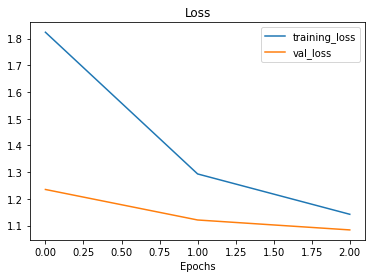

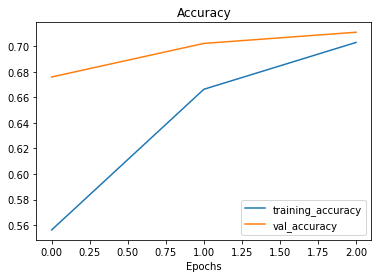

In [55]:
plot_loss_curves(history_101_food_classes_feature_extract)

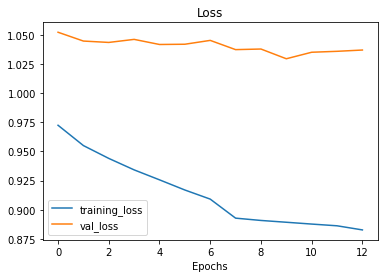

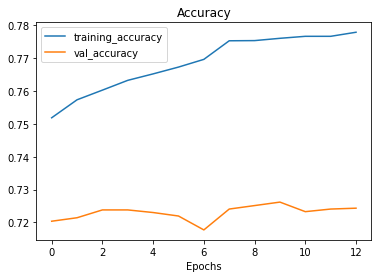

In [56]:
plot_loss_curves(history_101_food_classes_all_data_fine_tune)

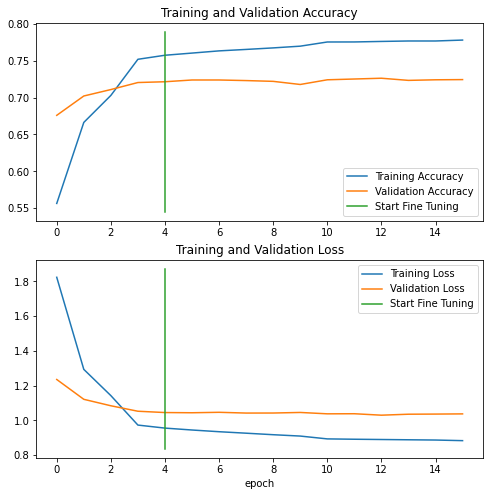

In [57]:
compare_history(history_101_food_classes_feature_extract, history_101_food_classes_all_data_fine_tune)

In [60]:
dir = "/content/07_efficientnetb0_fine_tuned_101_classes_mixed_precision"
loaded_saved_model = tf.keras.models.load_model(dir)

In [61]:
# Check loaded model performance (this should be the same as results_feature_extract_model)
results_loaded_saved_model = loaded_saved_model.evaluate(test_data)
results_loaded_saved_model

790/790 [==============================] - 52s 64ms/step - loss: 1.0370 - accuracy: 0.7204


[1.0369585752487183, 0.7203564643859863]

In [62]:
img = "burger.jpeg"

In [63]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [64]:
import matplotlib.pyplot as plt


(-0.5, 223.5, 223.5, -0.5)

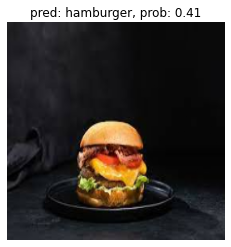

In [65]:
img = load_and_prep_image(img, scale=False) # load in target image and turn it into tensor
pred_prob = loaded_saved_model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [None, 224, 224, 3]
pred_class = class_names[pred_prob.argmax()] # find the predicted class label
# Plot the image with appropriate annotations
plt.figure()
plt.imshow(img/255.) # imshow() requires float inputs to be normalized
plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
plt.axis(False)

In [66]:
samosa_img = "samosa.jpeg"

(-0.5, 223.5, 223.5, -0.5)

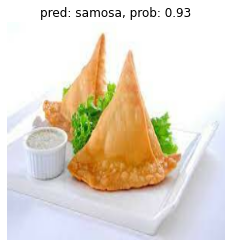

In [67]:
img = load_and_prep_image(samosa_img, scale=False) # load in target image and turn it into tensor
pred_prob = loaded_saved_model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [None, 224, 224, 3]
pred_class = class_names[pred_prob.argmax()] # find the predicted class label
# Plot the image with appropriate annotations
plt.figure()
plt.imshow(img/255.) # imshow() requires float inputs to be normalized
plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
plt.axis(False)